# Meghanjali Chennupati (U30308400)


# Description of the data set:

The data set is about CRYPTOTHERAPHY ANALYSIS.This data set provides patients characterstics after the tratment the level of cancer.
It states whether the cancer level is benign(1) or malignant(0). This data set contains the following attributes:
1. SEX- It indicates the gender of the patient whetehrthe patient is a male or female.(1=male,2=female)
2. AGE- It indicates the age of the patient.
3. Time- This column indicates the time for the treatment in seconds.
4. Number of warts- This column indicates the numbe rof warts that are grown on a patients body. ( Warts are skin growths caused by a virus. The virus infects the top layer of skin, causing it to grow rapidly.Warts can grow anywhere on your body. Most warts go away on their own, but they may come back.)
5. Type : It indicates the type of wart. ( there are mainly three types of warts . 1,2,3 ( common warts, flat,filtform)
6. Area: The composition of wart .
7. Result of the tratment: It indicates the level of cancer after tratment.

The target variable is Result of the tratment. It is a binary classifier. benign(1) or malignant(0).
This data set is a classification type of problem.
The data set contains the instances of the 90 patients that are obtained from the results of cryptotheraphy treatment.

Source of the data set: It is taken from the Mashhad University of Medical Sciences, Mashhad, Iran. Fahime Khozeimeh, MD, Pouran Layegh, Professor of Dermatology and Roohallah Alizadehsani, PhD student and Mohamad Roshanzamir, PhD candidate.

It is published in UCI MACHINE LEARNING REPOSITORY: https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+


# Business problem statement and its purpose:
1. The analysis of this data set will identify the results of the cancer treatment. It is a health care industry domain.
2. Purpose :  This will helps the to explore and draw some inferences that may help the people to undergo the Cryotherapic treatment.
3. It also helps the crytotheraphists to see the sttaistics and how well their treatment serves the people. How they can improve the level of treatment.
4. It also helps to identify what age groups of patients  the treatment is getting malignant and what age groups of people is getting benign 
5. In this notebook I would like to do data preprocessing that is ready to apply modleing .
6. For this assignment I would like to use the following algorithms (Discussed in class so far) to identify how well my models are trained and see how it performs of test data and if a new data is given it can able to predict the likelihood of results of level of tretament .


# Step 1: Install all the libraries:

In [1]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import summarytools
from summarytools import dfSummary
from sklearn.preprocessing import  MinMaxScaler

# Step 2 : Setting up the random seed :
This will helps us to produce reproducible results when we are running multiple times.


In [2]:
np.random.seed(1)

# Step 3: Load the data

In [3]:
crypto_data=pd.read_csv("Cryotherapy.csv")

# Step 4: Conduct initial exploration of the data
We have a number of input variables and one target variable. For this analysis, the target variable is Result_of_treatment.

First, our initial exploration of the data should answer the following questions:

How many rows and columns

How much of a problem do we have with na's?

What types of data are there?

What types of data are stored in columns

identify which variables are numeric and may need to be standardized later

identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.

Identify errors in the data - this is a common problem with categorical vars where the category is mispelled or spelled differently in some instances.

In [4]:
# look at the data
crypto_data.head(5) # note that we don't want to dump all the data to the screen

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [5]:
# generate a basic summary of the data
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [6]:
# generate a statistical summary of the numeric value in the data
crypto_data.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [7]:
# Another way of displaying summary statistics for our data is through summary tools:

dfSummary(crypto_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sex[int64],Mean (sd) : 1.5 (0.5)min < med < max:1.0 < 1.0 < 2.0IQR (CV) : 1.0 (2.9),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABfElEQVR4nO3YQWoCMRiG4aQMopsZRPAwHqKH7SG8jZS4qFLQ6a6bQtVRaT94nnXmJ4uXCUkdx7HAf/fy1xuAa3SXFtRaF6WU2cT5n+M4HiZ+C99+DbXWulitVq993y+nDN/v9++11jexcq9Lf9RZ3/fLzWZzGIbheMvg1tp8u90ud7vdrJQiVO5y8egvpZRhGI7r9fpjwvzFhG/gB5cpIgiVCFcd/XCNZ74QCZWHePYLkVB5lKe+EAmVh3rWC5HLFBGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRumsWtdbmtw5urc1Pp1NXSulrrTdvjDj9+XzuprZyac0Xp9ROfcfUsJ8AAAAASUVORK5CYII="">",0(0.0%)
2,age[int64],Mean (sd) : 28.6 (13.4)min < med < max:15.0 < 25.5 < 67.0IQR (CV) : 17.0 (2.1),24 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACx0lEQVR4nO3dvY7aQBRA4Tv8yQZkC6GFjiZlJApKHiIPm0dIwRNQpKGis0DICGcJxpAmbJMV4Bl74+s9X71jKI7W65HvjrlerwJUXeN/fwHgGa1HP2CM8UWkY3n90/V6fbVcC7y5G6oxxh8Oh9+CIBjYXHy/3++MMd+JFa4e/UbtBEEwmM/nr2EYHvNcOI5jb7FYDLbbbUdECBVOHt76RUTCMDyORqNfFtf3LdYA/+BhCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqPPUfpzVyPCRDhIMyKqWWoboekiHCQRlVU8tQxeGQDBEOyqiiuoYqIk6HZIhwUEal8DAFFQgVKpR668+yrC0igTHG9hINEblYrAsul0vb9kNRPaWFmiRJO03T6WQyaTabzdwPNFmWtZMk+dLv91eNRiPNszZNUy/Lsq/H4/GHiNj+jYoKKS3U0+nU8jyvO5vNjuPxeJd3/Xq9HiyXy5fZbPYz7/q/a7vn87mZ93NRTaU/9fd6Pasn791u59uuv61FffAwBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKtX7Nz4XjewpMBxSMUN/h+p4C0wHFI9R3uLyn8JmnAxzn1O7ehQj1Dtv3FOQTTge4zqk9ugsRKopiPaf2zF2IUFEohzm1u3chQi2B446B7VTDTS13HAi1YC47Bi5TDTd13XEg1IK57Bi4TDWI1HvHgVBL4jKZ4LDbIFLTHQdCxRvHfdBSJ38JFSLivg9a9uTvU6HGcezlvfDhcPBERJIk8aIo6n7keq2f7fq94zj2sixrid2OQ9Dv91+m0+nZ9/3feRdvNhtvtVp14zjuRVF0yrP2mb7+AK+IX/wFggEBAAAAAElFTkSuQmCC"">",0(0.0%)
3,Time[float64],Mean (sd) : 7.7 (3.4)min < med < max:0.2 < 8.5 < 12.0IQR (CV) : 6.1 (2.3),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmklEQVR4nO3cwY6aUBSA4XPraFATiDHRnS/QpAuXPkQfto/QhU/gG7gzMQQjHSICXbVp0kGByx058H9bc2cI+SNyc8AURSFA13159QEAVby9+gDQH8aYqYhMGi6/FUXxXvYhoaIVxpjpcrn87vv+osn6y+USGmN+lMVKqGjLxPf9xW63ew+CIKmzMIoib7/fL87n80RECBXuBUGQrFarXw2WTh99yM0UVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKjPnhL8sJfT/P83Gbx/MvQoWI2E/op2nqZVn2NUmSnyLSZB71IULFH40n9EVEjsfj4nA4zO73+8jFwRFqz1hcvv08z8dBEIRNJvTDMHw4oW+LUHvE5vLt+tJti1D7pfHl2/Wl2xah9lCTB+xcX7ptsY8KFQgVKhAqVCBUqECoUIFQoQKhQgX2UUu4fNcn6iPUD7h+1yfqI9SPOX3XJ+rrbahtDAE3nSSSJ+/6RH29DLXrQ8Cor5ehSseHgFFfX0MVkeav6e76JNEQsY8KFQgVKhAqVOj0b1TbB9XaPp7P0OVn61+ps6H2+UG1MmyrletsqNLjB9UeYFutRJdDFZF+Pqj2DNtq/+NmCioQKlQgVKjg9DcqWy1oi7NQ2WpBm1x+o7LVgtY4355iqwVt4GYKKhAqVCBUqPD0N+oQJ5hsZVk2FhHfGFN36WDP2TMPQx3iBJOtOI7HaZp+22w2o9FoVGu3Y6jnrIpn36hDnGCycrvd3jzPm22322S9Xod11g71nFVRaXtqiBNMtubzOeesRdxMQQVChQqEChUIFSoQKlQgVKhAqFCh0j5qFEVe3T98vV49EZE4jr3T6TT7zPVa/7fW47ZdX6Wv31mLlThvff1VAAAAAElFTkSuQmCC"">",0(0.0%)
4,Number_of_Warts[int64],Mean (sd) : 5.5 (3.6)min < med < max:1.0 < 5.0 < 12.0IQR (CV) : 6.0 (1.5),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqUlEQVR4nO3cP2/aQByH8d9BQOaPjBBqsrF0rNSBkRfRF9uX0IFXwNAlExsSQo7iBmEMndKlNOC7XPDXfT5zz1joUTife+dOp5MBdde69Q0A17i79A+ccz0z63pef386nV48xwJ/vBmqc643mUy+pWk69rn409PT1jn3nVgR6tJf1G6apuP5fP4yGo12VS6cZVmyWCzGm82ma2aEi

In [8]:
# Check the missing values by summing the total na's for each variable
crypto_data.isna().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [9]:
crypto_data.shape

(90, 7)

Text(0.5, 1.0, 'Result_of_Treatment')

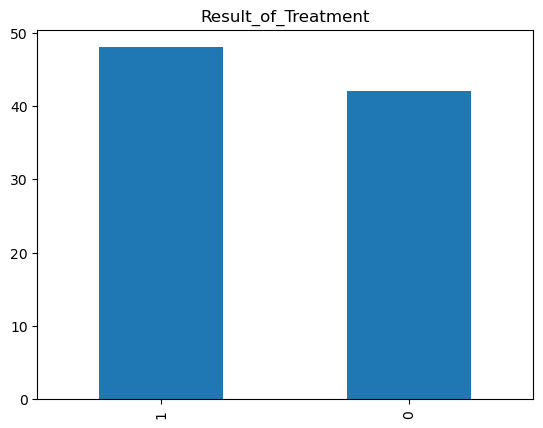

In [10]:
crypto_data['Result_of_Treatment'].value_counts().plot(kind='bar').set_title('Result_of_Treatment')

In [11]:
class_counts = crypto_data['Result_of_Treatment'].value_counts()
class_ratios = class_counts / class_counts.sum()
print("Class ratios:")
print(class_ratios)

Class ratios:
1    0.533333
0    0.466667
Name: Result_of_Treatment, dtype: float64


# Summary the findings from our initial evaluation of the data
1. If we observe from the above outputs there are total 90 rows and 7 columns.
2. All the variables are of int64 data type.
3. Only Time is float64 data type.
4. If we observe na's all the columns got 0 . It means there are no na's.
5. There is no object data type. No need to type caste.
6. If we observe the summary output it contains the distinct values in each column.
7. Categorical variables are there but they are already encoded so no need to  do encoding . Other wise I can do one hot or dummy encoding.
8. Sex,Type, Result-of_treatment are categorical. But they are already encoded in data itself.
9. Age, Time, Numbe_of_Warts, Area  are continous variables. 
10. From the above graph if you observe there is no much difference between two classes . If i have significant (very large difference of one class having 99 percent other class having 1 percent then it is important to address data imbalance. so Here in my data set i am not adressing data imbalance as we see the above ratios 1- 0.53, 0- 0.46. (Its  quite ok).

#  Process the data

Conduct any data prepartion that should be done BEFORE the data split.

Split the data.

Conduct any data preparation that should be done AFTER the data split.

 #  Conduct any data prepartion that should be done BEFORE the data split

  Tasks at this stage include:
  
  Drop any columns/features -  
    
    In my data set each of the variable is useful. So i am including everything and not dropping.
    
    Decide if you with to exclude any observations (rows) due to missing na's.
  
    In this data set from the intial exploration there are no null values. 
   
    Conduct proper encoding of categorical variables You can transform them using dummy variable encoding, one-hot-encoding, or label encoding.
     
    As I mentioned above  Sex,Type, Result-of_treatment  are categorical but they are already encoded no need to encode

# Seperate the Independent and dependent variables


In [128]:

target = 'Result_of_Treatment'
predictors = list(crypto_data.columns)
predictors.remove(target)

# Split the data in to training and testing set

In [129]:
train_df, test_df = train_test_split(crypto_data, test_size=0.3)

# Conduct any data prepartion that should be done AFTER the data split
We will look at the following:

imput any missing numeric values using the mean of the variable/column

   There are no missing values . so no need to impute in our data set.

remove differences of scale by standardizing the numerical variables
    
      This step is usually done to remove the influence of scale so that all the variables are kept on same scale.
      
      Algorithims like decision tree are insensitive to scaling. Not necessary.
      
      But Algorithims svm, log reg are sensitive to scaling. Necessary.
      
      So I am doing this scaling using standard scaler. I can also use minmax but as per class i am following standard scaler.
      
      As in asgt i am using logisticregression, svm,decisiontrees . So, for svm logistic it is better to do scaling since they are sensitive to scaling so i am doing scaling using Standard scaler

# Scale the data using standard scalar to remove the influence of range of values

In [130]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['Number_of_Warts','Area','Time','age']                
               
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[cols_to_stdize])

# Transform the predictors of training and validation sets
train_X = scaler.transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array
train_y = train_df[target] # train_target is now a series object

test_X = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object
test_y = test_df[target] # validation_target is now a series object

# Explaination

I have scaled all my numeric continous value columns Number_of_warts,Area,Time,age to remove the influence of scale.

 i saved to the seperate files

# Save the data

In [131]:
train_X = train_df[predictors]
train_y = train_df[target] # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

train_df.to_csv('crypto_data_train_df.csv', index=False)
train_X.to_csv('crypto_data_train_X.csv', index=False)
train_y.to_csv('crypto_data_train_y.csv', index=False)
test_df.to_csv('crypto_data_test_df.csv', index=False)
test_X.to_csv('crypto_data_test_X.csv', index=False)
test_y.to_csv('crypto_data_test_y.csv', index=False)